<center><h1>SaRLVision Agent Evaluation</h1>
<h2>Matthias Bartolo</h2>

</center>

In [1]:
import SaRLVision as srlv
import gymnasium as gym

from SaRLVision.utils import *
from SaRLVision.agents import *

CUDA is available! Using GPU for computations.


**<h3> Defining Classes </h3>**

In [2]:
classes = ['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
print(classes)
print('\033[93m' + 'Number of classes: ' + '\033[0m' + str(len(classes)))

['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
Number of classes: 20


**<h3> Evaluation Experiment 1: Exploration and Saliency Ranking </h3>**

**<h4> Normal DQN Agent - Random Exploration - VGG16 - No SaRa </h4>**

In [3]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': False,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Random Explore - VGG16 - No SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=RANDOM_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name)

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

**************************************************
Executing for class: cat
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat
****************************************************************************************************
Epoch 1 done for class cat.
****************************************************************************************************
**************************************************
Executing for class: bird
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalV

In [12]:
name = "Normal DQN - Random Explore - VGG16 - No SaRa"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

,average_iou,average_precision,average_precision_voc,iou_threshold,num_images
aeroplane,0.610828,73.012099,76.414344,0.5,205
bicycle,0.477957,47.727971,25.657391,0.5,250
bird,0.48656,50.105425,64.253547,0.5,289
boat,0.401959,32.887689,18.291003,0.5,176
bottle,0.257863,16.161522,4.143756,0.5,240
bus,0.563206,70.615099,74.565032,0.5,183
car,0.463519,46.547209,67.887394,0.5,775
cat,0.520762,55.759697,73.123607,0.5,332
chair,0.268005,13.914544,4.052625,0.5,545
cow,0.479128,56.58116,64.270185,0.5,127


{0.5: 46.86320237649094}


**<h4> Normal DQN Agent - Random Exploration - VGG16 - No SaRa  (SaRa Inference)</h4>**

In [3]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': True,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Random Explore - VGG16 - No SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=RANDOM_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name + ' (SaRa Inference)')

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

**************************************************
Executing for class: cat
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat
****************************************************************************************************
Epoch 1 done for class cat.
****************************************************************************************************
**************************************************
Executing for class: bird
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalV

In [4]:
name = "Normal DQN - Random Explore - VGG16 - No SaRa (SaRa Inference)"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

,average_iou,average_precision,average_precision_voc,iou_threshold,num_images
aeroplane,0.414582,44.072466,60.174526,0.5,205
bicycle,0.39782,32.469179,14.007301,0.5,250
bird,0.392946,32.945126,13.502087,0.5,289
boat,0.33841,26.093084,60.008112,0.5,176
bottle,0.222409,10.508797,4.337408,0.5,240
bus,0.415337,34.694599,70.082176,0.5,183
car,0.371039,32.163065,60.07333,0.5,775
cat,0.400508,33.242063,68.703001,0.5,332
chair,0.254209,13.592735,15.339778,0.5,545
cow,0.415463,26.796135,12.742839,0.5,127


{0.5: 39.23205226371985}


**<h4> Normal DQN Agent - Random Exploration - VGG16 - With SaRa </h4>**

In [5]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': True,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Random Explore - VGG16 - With SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=RANDOM_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name)

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

In [6]:
name = "Normal DQN - Random Explore - VGG16 - With SaRa"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

**<h4> Normal DQN Agent - Guided Exploration - VGG16 - No SaRa </h4>**

In [3]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': False,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Guided Explore - VGG16 - No SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=GUIDED_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name)

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

**************************************************
Executing for class: cat
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat
****************************************************************************************************
Epoch 1 done for class cat.
****************************************************************************************************
**************************************************
Executing for class: bird
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalV

In [9]:
name = "Normal DQN - Guided Explore - VGG16 - No SaRa"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

,average_iou,average_precision,average_precision_voc,iou_threshold,num_images
aeroplane,0.59091,70.713317,65.538709,0.5,205
bicycle,0.45091,37.732487,17.840162,0.5,250
bird,0.480729,49.473979,67.840698,0.5,289
boat,0.399517,27.794801,11.261059,0.5,176
bottle,0.232197,11.1463,2.169323,0.5,240
bus,0.53572,50.054477,39.067754,0.5,183
car,0.4419,47.432441,64.489635,0.5,775
cat,0.514672,60.106315,64.849236,0.5,332
chair,0.289735,17.438025,65.555572,0.5,545
cow,0.474109,46.361738,26.483517,0.5,127


{0.5: 40.09693276325812}


**<h4> Normal DQN Agent - Guided Exploration - VGG16 - No SaRa  (SaRa Inference)</h4>**

In [7]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': True,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Guided Explore - VGG16 - No SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=GUIDED_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name + ' (SaRa Inference)')

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

**************************************************
Executing for class: cat
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat
****************************************************************************************************
Epoch 1 done for class cat.
****************************************************************************************************
**************************************************
Executing for class: bird
**************************************************
Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalV

In [8]:
name = "Normal DQN - Guided Explore - VGG16 - No SaRa (SaRa Inference)"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

,average_iou,average_precision,average_precision_voc,iou_threshold,num_images
aeroplane,0.382686,30.362763,27.631094,0.5,205
bicycle,0.38581,38.457516,26.212314,0.5,250
bird,0.422949,39.653456,19.982425,0.5,289
boat,0.332464,25.782856,12.790486,0.5,176
bottle,0.201487,13.722322,58.564465,0.5,240
bus,0.437089,40.464249,72.366943,0.5,183
car,0.36681,34.382461,62.102034,0.5,775
cat,0.408836,39.268937,59.049647,0.5,332
chair,0.270294,18.6982,59.083955,0.5,545
cow,0.403747,34.414027,14.81575,0.5,127


{0.5: 41.5366775411836}


**<h4> Normal DQN Agent - Guided Exploration - VGG16 - With SaRa </h4>**

In [ ]:
# Iterating over the classes
for current_class in classes:
    # Printing the class name
    print('*'*50)
    print('\033[92m' + 'Executing for class: ' + current_class + '\033[0m')
    print('*'*50)

    # Setting the environment configuration
    env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
                'dataset_year': '2007',
                'dataset_image_set': 'test',
                'feature_extractor': VGG16FeatureExtractor(), 
                'target_size': VGG16_TARGET_SIZE,
                'current_class': current_class,
                'use_sara': True,
                'threshold': 0.5,
                }

    # Creating the environment
    env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

    # Setting the environment to test mode
    env.test()

    # Setting name
    name = "Normal DQN - Guided Explore - VGG16 - With SaRa"

    # Creating the Replay_Buffer
    replay_buffer = Replay_Buffer(env)

    # Creating the DQN agent
    dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=GUIDED_EXPLORE)

    # Loading the model
    dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

    # Setting the epsilon to 0
    dqn_agent.epsilon = 0.0

    # Evaluating the agent
    dqn_agent.evaluate(path='evaluation_results/' + name)

    # Closing the environment
    env.close()
    
    # Memory Cleaning
    del env, replay_buffer, dqn_agent

In [ ]:
name = "Normal DQN - Guided Explore - VGG16 - With SaRa"
dfs, mAps = calculate_detection_metrics('evaluation_results/' + name, save_path=None)
print(mAps)

In [3]:
# Selecting class
current_class = classes[3]

# Setting the environment configuration
# env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
#             'dataset_year': '2007',
#             'dataset_image_set': 'test',
#             'feature_extractor':VGG16FeatureExtractor(), 
#             'target_size': VGG16_TARGET_SIZE,
#             'current_class': current_class,
#             'use_sara': True,
#             'allow_classification': True,
#             'threshold': 0.5,
#             }

# # Creating the environment
# env = gym.make('DetectionEnv-v0-Test', env_config=env_config)

# Setting name
name = "Normal DQN - Random Explore - VGG16 - With SaRa"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env)

# # Creating the DQN agent
# dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=GUIDED_EXPLORE)

# # Loading the model
# dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

# # Setting the epsilon to 0
# dqn_agent.epsilon = 0.0


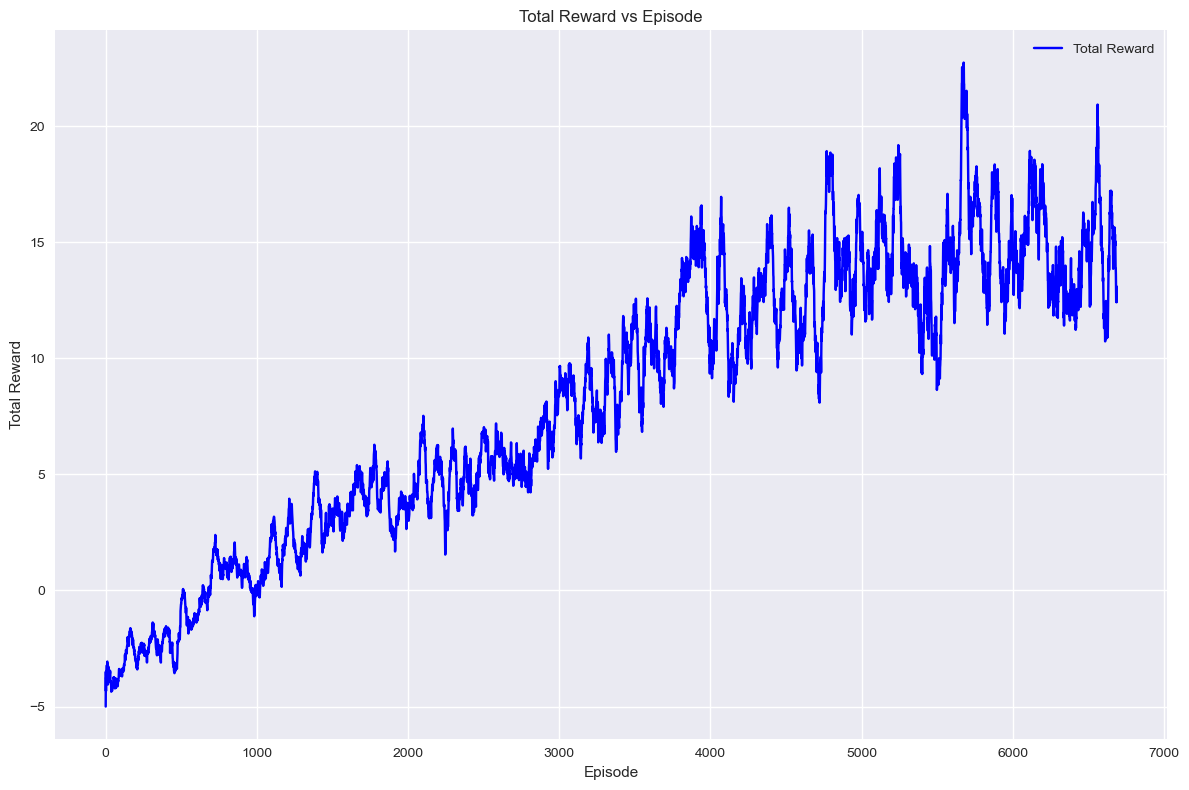

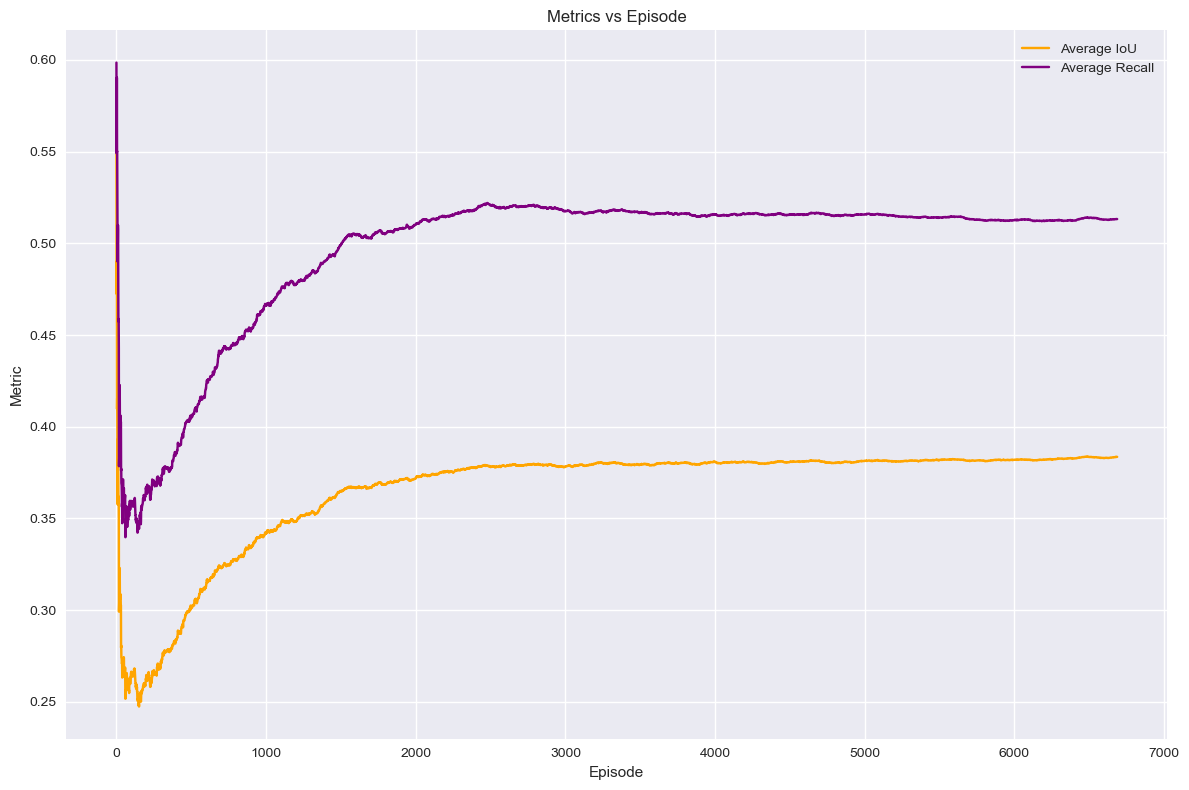

In [4]:
# Load from Numpy
dqn_episode_info = np.load('evaluation_models/' + name + '/' + current_class + '/episode_info.npy', allow_pickle=True).item()

rewards_list = dqn_episode_info["episode_avg_rewards"]
# Plotting the rewards
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(rewards_list, label='Total Reward', color='blue')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


iou_list = dqn_episode_info["avg_iou"]
recall_list = dqn_episode_info["avg_recall"]

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(iou_list, label='Average IoU', color='orange')
plt.plot(recall_list, label='Average Recall', color='purple')
plt.xlabel('Episode')
plt.ylabel('Metric')
plt.title('Metrics vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()